# Taking a Shot at Free Throws



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_file="./Data/NBA_Free_Throw_Data.csv"

# Read the DF and display the info
NBA_Data=pd.read_csv(data_file)
NBA_Data.head()

,Team,Season,Venue,Wins,Loss,Win%,FT Made,FT Att,FT%,Win Rnk,Loss Rnk,Win% Rnk,FT Made Rnk,FT ATT Rnk,FT% Rnk,Total Points
0,Atlanta Hawks,2012-13,Home,25,16,0.610,595,856,0.695,15,15,15,27,24,28,4075
1,Boston Celtics,2012-13,Home,27,13,0.675,675,889,0.759,13,12,13,20,21,15,3940
2,Brooklyn Nets,2012-13,Home,26,15,0.634,724,1003,0.722,14,14,14,11,10,25,4001
3,Charlotte Hornets,2012-13,Home,15,26,0.366,823,1076,0.765,28,28,28,3,6,11,3955
4,Chicago Bulls,2012-13,Home,24,17,0.585,685,892,0.768,16,16,16,17,20,10,3809


# Do Free Throws Win Games?

Starting from the basics to get a quick check and see what the data says.

It appears to look like there may be a trend, but the line is udnerfit.

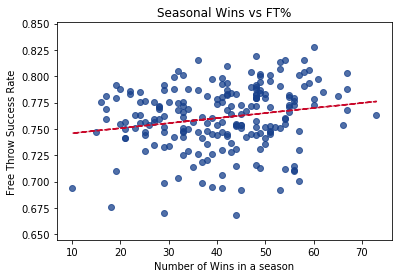

In [2]:
# Create 3 dataframes for home away and total
# This allows us to compare all of it.

away=NBA_Data.loc[NBA_Data["Venue"] == "Road"]
home=NBA_Data.loc[NBA_Data["Venue"] == "Home"]
total=NBA_Data.loc[NBA_Data["Venue"] == "Total"]

# Define x and y and plot the graph
x=total["Wins"]
y=total["FT%"]
plt.scatter(x,y, color="#17408B", alpha=.75 )

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), linestyle="--" ,color="#C9082A" )

#Label the graph
plt.xlabel("Number of Wins in a season")
plt.ylabel("Free Throw Success Rate")
plt.title("Seasonal Wins vs FT%")

#Save and plot the figure
plt.savefig("./Graphs/1.Wins_vs_FT%.png")
plt.show()


## This next group of plots is explores the correlation between win rankings and Free throws

The concept behind this is if they teams are grouped by win rank, then the data will not necessarily follow teams, but and abstracted ranking of those teams for each year.

While the previous graph appeared to show a trend, the line seemed to be underfit.

It then looks for correlations between the average of the different free throw stats for each rank.

I think that we can say that there is a slight trend between the two.

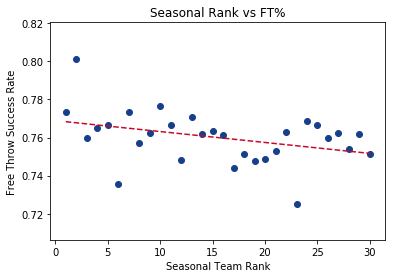

In [3]:

# Group by win rank and display the DF
Win_Rank=total.groupby("Win Rnk").mean()
Win_Rank.head()

# Define x and y and plot the graph
x=Win_Rank.index
y=Win_Rank["FT%"]
plt.scatter(x,y, color="#17408B" )

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), linestyle="--" ,color="#C9082A" )

#Label the graph
plt.xlabel("Seasonal Team Rank")
plt.ylabel("Free Throw Success Rate")
plt.title("Seasonal Rank vs FT%")

#Save and plot the figure
plt.savefig("./Graphs/2.WRank_vs_FT%.png")
plt.show()

# More Free Throws Shot at Home or Away?

We wanted to see if there was any variation in home or away games in the data.

This could possibly show any referee bias.

To view this, we put it all on the same graph.

There appear to be clusters in the upper right that bear this out.

We're plotting Points versus FT Attempts to see if we can visualize how much they may contribute to points.

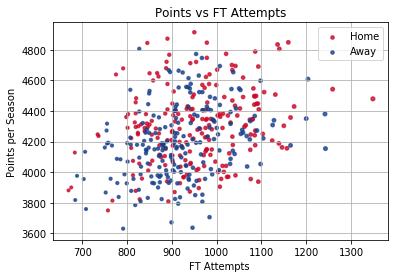

In [4]:
#Create the plots.
plt.scatter(home['FT Att'], home['Total Points'], label = 'Home', s= home['FT Att'] *.01,\
            color=["#C9082A"], edgecolor="#C9082A", alpha = .75, marker="o", linewidths=1.5)
plt.scatter(away['FT Att'], away['Total Points'], label = 'Away', s=away['FT Att'] *0.01, \
            color=["#17408B"], edgecolor="#17408B", alpha = .75, marker="o", linewidths=1.5)

#Label the Plot
plt.title('Points vs FT Attempts')
plt.xlabel('FT Attempts ')
plt.ylabel('Points per Season')

# # Create a legend

plt.legend()
plt.grid()

#Save and display the plot

plt.savefig("./Graphs/3.Points_vs_FT_Att.png")
plt.show()

# Comparing Free Throw Attempts

Next, we went to check into see how the number of free throws were attenpted in home games and away games

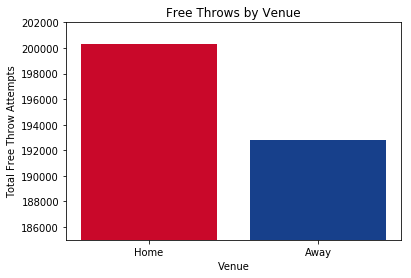

In [12]:
hometotal= home["FT Att"].sum()
awaytotal= away["FT Att"].sum()

plt.bar("Home",hometotal,label="Home Attempts", color="#C9082A")
plt.bar("Away",awaytotal,label="Away Attempts",  color="#17408B")
plt.ylim(185000, 202000)

plt.title("Free Throws by Venue")
plt.xlabel("Venue")
plt.ylabel("Total Free Throw Attempts")
plt.savefig('./Graphs/4.Home_vs_Away_Bar.png',bbox_inches='tight')
plt.show()

# Perception Matters

The previous graphs were misleading. When you look holistically at the data, there is only a 1% difference in the amount of Free Throw Attempts home and away.

Because the the previous bars were a sum, it made the appearance of a correlation where there was none.

When you look at everything, it does not appear to be a large bias after all.


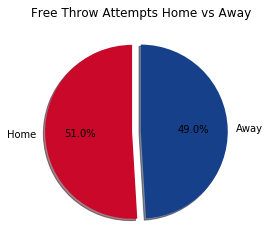

In [6]:
pie_data=[hometotal,awaytotal]

colors = ["#C9082A","#17408B"]
label =["Home","Away"]

plt.pie(pie_data, explode = [.1,0],colors=colors, labels=label, shadow=True, autopct="%1.1f%%", startangle=90)
plt.title("Free Throw Attempts Home vs Away")
plt.savefig("./Graphs/5.Percent_Home_vs_Away_Pie.png")
plt.show()

# Outside the Norm

This next section is about breaking down which stats contributes more to wins in a season.

It calculates the mean and standard deviation for the combined home and away games.

After that, it finds the teams that were outside of that on both sides.

Then, it compares the average of those populations with the average of the total population.

This is imporant because these relationships may not be linear and if we want to be best (or worst), then we'll want to see which factor contributes most on the edges.

In [7]:
# Find the mean and standard deviation for FT Attemtps, FT Made, FT%, and Calculate average wins.
mean_FT_Att_per_season=total["FT Att"].mean()
stdev_FT_Per_season=total["FT Att"].std()
mean_FT_Made_per_season=total["FT Made"].mean()
stdev_FT_Made_season=total["FT Made"].std()
mean_FT_pct_per_season=total["FT%"].mean()
stdev_FT_pct_per_season=total["FT%"].std()
Average_wins=total["Wins"].mean()

#Find the average wins of the groups that are greater than 1 standard deviation from average
top_attempts=total.loc[total["FT Att"]>=(mean_FT_Att_per_season+stdev_FT_Per_season)]
most_shooters=top_attempts["Wins"].mean()
top_made=total.loc[total["FT Made"]>=(mean_FT_Made_per_season+stdev_FT_Made_season)]
most_made=top_made["Wins"].mean()
top_percentages=total.loc[total["FT%"]>=(mean_FT_pct_per_season+stdev_FT_pct_per_season)]
good_shooters=top_percentages["Wins"].mean()

#Find the average wins of the groups that are less than 1 standard deviation from average
bottom_attempts=total.loc[total["FT Att"]<=(mean_FT_Att_per_season-stdev_FT_Per_season)]
least_shooters= bottom_attempts["Wins"].mean()
bottom_made=total.loc[total["FT Made"]<=(mean_FT_Made_per_season-stdev_FT_Made_season)]
least_made=bottom_made["Wins"].mean()
bottom_percentages=total.loc[total["FT%"]<=(mean_FT_pct_per_season-stdev_FT_pct_per_season)]
worst_shooters=bottom_percentages["Wins"].mean()

In [8]:
display_df=pd.DataFrame( {"Attempts" : [most_shooters,least_shooters],
                          "Made": [most_made, least_made],
                          "Percentage": [good_shooters,worst_shooters]
                         } , index=["Best","Worst"])
print(f"Average Wins={Average_wins}")
display_df

Average Wins=40.99523809523809


,Attempts,Made,Percentage
Best,43.878788,43.264706,47.20000
Worst,38.655172,34.888889,39.84375


# Visualizing the outliers

This graph was made to check to see if there was any sort of clumping or clustering of in the wins versus free throw attempts.

It looks like there may be.

It appears the top part of the graph may be clustered all above 40 wins per season.

The bottom half appears to not be clustered in the opposite manner.

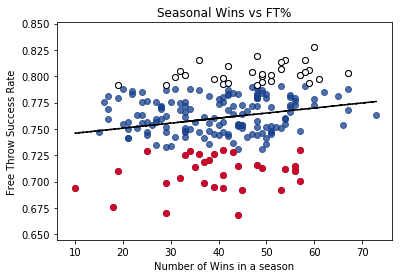

In [9]:
# Define x and y and plot the graph
x=total["Wins"]
y=total["FT%"]

plt.scatter(x,y, color="#17408B", alpha=.75 )

x_outliers=top_percentages["Wins"]
y_outliers=top_percentages["FT%"]

plt.scatter(x_outliers,y_outliers, edgecolor="Black" ,color="#FFFFFF")

x_bottoms=bottom_percentages["Wins"]
y_bottoms=bottom_percentages["FT%"]

plt.scatter(x_bottoms, y_bottoms, color="#C9082A")

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), linestyle="--" ,color="#000000" )

#Label the graph
plt.xlabel("Number of Wins in a season")
plt.ylabel("Free Throw Success Rate")
plt.title("Seasonal Wins vs FT%")

#Save and plot the figure
plt.savefig("./Graphs/6.Wins_vs_FT%_with_outliers.png")
plt.show()

# Checking what contributed more

We were curious at to what factor contributed more between the best teams and the worst teams.

It looks like percentages matter more for the best, but didn't matter as much for the worst.

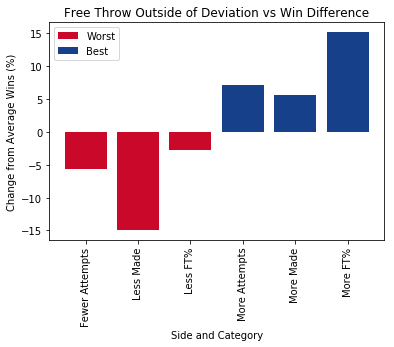

In [10]:
bar1=["Fewer Attempts", "Less Made", "Less FT%" ]
bar2=[ "More Attempts", "More Made", "More FT%"]
worst=[least_shooters, least_made, worst_shooters]
best=[ most_shooters, most_made, good_shooters]
worst_change= [(wins-Average_wins)/Average_wins*100 for wins in worst]
best_change= [(wins-Average_wins)/Average_wins*100 for wins in best]

legend=["Worst","Best"]
plt.bar(bar1, worst_change, color="#C9082A")
plt.bar(bar2, best_change, color="#17408B")
plt.xticks(rotation=90)
plt.xlabel("Side and Category")
plt.ylabel("Change from Average Wins (%)")
plt.title("Free Throw Outside of Deviation vs Win Difference")
plt.legend(legend)
plt.savefig("./Graphs/7.Outside_Normal.png")
plt.show()

# Summary of Findings

## Do Free Throws Win Games?

They contribute marginally to the outcomes of games. This was best shown in the win ranking versus free throw percentage.

## Are More Free Throws Shot at Home?

It does not look to be significant. This is best shown in the pie chart.

## What Contributes Most in the Best and Worst?

The best teams have a greater impact with free throw precentages. The worst teams are more affected by fewer being made.

